## Imports

In [1]:
import pandas as pd
import numpy as np
import os

# import for pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, PowerTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, Normalizer
from scipy.stats import yeojohnson # this ia extention to boxcox

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report
from sklearn.base import BaseEstimator, TransformerMixin

import warnings
warnings.filterwarnings('ignore')

In [3]:
import sklearn
sklearn.__version__

'1.3.2'

In [2]:
def save_ss(ss, y_pred, file_name="submission.csv"):
    """function to save submission file"""
    ss["Survived"] = y_pred
    SAVE_PATH = os.path.join(SUBMISSION_SAVE_DIR, "Submissions")
    os.makedirs(SAVE_PATH, exist_ok=True)
    PATH = os.path.join(SAVE_PATH, file_name)
    ss.to_csv(PATH, index=False)
    print(f"Save at : {PATH}")

## Reading Data

In [20]:
DRIVE_LOCATION = "Dataset"
TRAIN_DATA_DIR = os.path.join(DRIVE_LOCATION, "0_raw_data", "train.csv")
TEST_DATA_DIR = os.path.join(DRIVE_LOCATION, "0_raw_data", "test.csv")
SS_DIR = os.path.join(DRIVE_LOCATION, "0_raw_data", "gender_submission.csv")
SUBMISSION_SAVE_DIR = DRIVE_LOCATION
TARGET_COL = "Survived"

In [12]:
train_df = pd.read_csv(TRAIN_DATA_DIR)
test_df = pd.read_csv(TEST_DATA_DIR)
ss = pd.read_csv(SS_DIR)

In [14]:
ss.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Iteration : 1 - Prediction Pipeline - Majority of class

In [13]:
train_df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [18]:
y_pred = np.zeros(ss.shape[0], dtype=int)

In [19]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


In [20]:
## saving submission
save_ss(ss, y_pred, "dummy_submission.csv")

Save at : Dataset\Submissions\dummy_submission.csv


## Iteration : 2 - Prediction Pipeline - Minority of class

In [21]:
train_df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [22]:
y_pred = np.ones(ss.shape[0], dtype=int)

In [23]:
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1]


In [24]:
## saving submission
save_ss(ss, y_pred, "dummy_submission1.csv")

Save at : Dataset\Submissions\dummy_submission1.csv


## Iteration : 3 - Prediction Pipeline - Random of class

In [25]:
train_df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [26]:
y_pred = np.random.choice([0,1], size=ss.shape[0])

In [27]:
print(y_pred)

[1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0
 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1
 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1
 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1
 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1
 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0
 0 1 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0
 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1
 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1
 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 0
 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0
 0 0 1 1 1 0 0 1 0 1 1]


In [29]:
## saving submission
save_ss(ss, y_pred, "dummy_submission-0-1.csv")

Save at : Dataset\Submissions\dummy_submission-0-1.csv


## Iteration : 4 - Prediction Pipeline - 

In [15]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Training Pipeline

- Preprocessing for numerical data : ['Age', 'SibSp', 'Parch', 'Fare']

  - Handeling Missing values - `Age`,`Fare` -> `median` imputation
  - Outlier Handeling - `None`
  - Scaling and Transformation
    - `Age` -> Power Transformation -> Minmax scaling
    - `Fare` -> Power Transformation

- Preprocessing for categorical data : ['Sex', 'Ticket', 'Cabin', 'Embarked', 'Pclass']

  - Handeling Missing values - `mode` imputation
  - Label or OneHot Encoding
    - `Sex` -> label encoding
    - `Embarked` -> onehot encoding

- Preprocessing for textual data : ['Name']

  - `Name` -> lower text -> extract initials -> onehot encoding

In [16]:
numerical_cols = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_cols = ['Sex', 'Ticket', 'Cabin', 'Embarked', 'Pclass']
textual_cols = ["Name"]

In [17]:
['Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked', 'Pclass', 'Name_Init']

['Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked', 'Pclass', 'Name_Init']

### Numerical Data Pipeline

`Age` - [`SimpleImpuet(median)`, `PowerTransform`, `MinMax`]

`SibSp` - [`passthrough`]

`Parch` - [`passthrough`]

`Fare` - [`SimpleImpuet(median)`, `PowerTransform`,]

In [18]:
num_age_col = ['Age']
num_age_imputer = SimpleImputer(strategy='median')
num_age_transform = PowerTransformer(method='yeo-johnson')
num_age_scale = MinMaxScaler()

num_fare_col = ['Fare']
num_fare_imputer = SimpleImputer(strategy='median')
num_fare_transform = PowerTransformer(method='yeo-johnson')

num_age_preprocessor = Pipeline(steps=[
    ('imputer', num_age_imputer),
    ('transform', num_age_transform),
    ('scale', num_age_scale)
])

num_fare_preprocessor = Pipeline(steps=[
    ('imputer', num_fare_imputer),
    ('transform', num_fare_transform)
])

In [21]:
# testing code
preprocessor1 = ColumnTransformer(
    transformers=[
        ('drop', 'drop', ['Ticket', 'Cabin']),
        ('power_minmax', num_age_preprocessor, num_age_col),
        ('power', num_fare_preprocessor, num_fare_col)
    ],
    remainder='passthrough'
)

pipeline1 = Pipeline(steps=[
    ('preprocessor', preprocessor1)
])


pipeline1.fit(train_df.drop(columns=[TARGET_COL]), train_df[TARGET_COL])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop', 'drop',
                                                  ['Ticket', 'Cabin']),
                                                 ('power_minmax',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('transform',
                                                                   PowerTransformer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['Age']),
                                                 ('power',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('transform',
                                                                   PowerTransformer())]),
                                                  ['Fare'])]))])

#### Testing on -> Train Data

In [22]:
# Transform the data
transformed_data = pipeline1.named_steps['preprocessor'].transform(train_df.drop(columns=[TARGET_COL]))

# Get feature names
feature_names = pipeline1.named_steps['preprocessor'].get_feature_names_out()

# Convert to DataFrame
transformed_df = pd.DataFrame(transformed_data, columns=feature_names)

transformed_df.head()

,power_minmax__Age,power__Fare,remainder__PassengerId,remainder__Pclass,remainder__Name,remainder__Sex,remainder__SibSp,remainder__Parch,remainder__Embarked
0,0.34316,-0.87882,1,3,"Braund, Mr. Owen Harris",male,1,0,S
1,0.542804,1.336651,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,C
2,0.395247,-0.790065,3,3,"Heikkinen, Miss. Laina",female,0,0,S
3,0.506943,1.067352,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,S
4,0.506943,-0.774439,5,3,"Allen, Mr. William Henry",male,0,0,S


#### Testing on -> Test Data

In [23]:
# Transform the data
transformed_data = pipeline1.named_steps['preprocessor'].transform(test_df)

# Get feature names
feature_names = pipeline1.named_steps['preprocessor'].get_feature_names_out()

# Convert to DataFrame
transformed_df = pd.DataFrame(transformed_data, columns=feature_names)

transformed_df.head()

,power_minmax__Age,power__Fare,remainder__PassengerId,remainder__Pclass,remainder__Name,remainder__Sex,remainder__SibSp,remainder__Parch,remainder__Embarked
0,0.500906,-0.802204,892,3,"Kelly, Mr. James",male,0,0,Q
1,0.647118,-0.913735,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,S
2,0.812334,-0.58923,894,2,"Myles, Mr. Thomas Francis",male,0,0,Q
3,0.408006,-0.70115,895,3,"Wirz, Mr. Albert",male,0,0,S
4,0.34316,-0.351245,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,S


### Categorical Data Pipeline

`Sex` - [`SimpleImpuet(most_frequent)`, `OrdinalEncode`]

`Ticket` - [`drop`]

`Embarked` - [`SimpleImpuet(most_frequent)`, `OneHotEncode`]

`Pclass` - [`passthrough`]

In [24]:
cat_sex_col = ['Sex']
cat_sex_imputer = SimpleImputer(strategy='most_frequent')
cat_sex_encode = OrdinalEncoder()

cat_sex_preprocessor = Pipeline(steps=[
    ('imputer', cat_sex_imputer),
    ('ordinal_encode', cat_sex_encode)
])

cat_embarked_col = ['Embarked']
cat_embarked_imputer = SimpleImputer(strategy='most_frequent')
cat_embarked_encode = OneHotEncoder(handle_unknown='ignore')

cat_embarked_preprocessor = Pipeline(steps=[
    ('imputer', cat_embarked_imputer),
    ('onehot_encode', cat_embarked_encode)
])

In [25]:
# testing code
preprocessor2 = ColumnTransformer(
    transformers=[
        ('drop', 'drop', ['Ticket', 'Cabin']),
        ('ordinal', cat_sex_preprocessor, cat_sex_col),
        ('onehot', cat_embarked_preprocessor, cat_embarked_col)
    ],
    remainder='passthrough'
)

pipeline2 = Pipeline(steps=[
    ('preprocessor', preprocessor2)
])


pipeline2.fit(train_df.drop(columns=[TARGET_COL]), train_df[TARGET_COL])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop', 'drop',
                                                  ['Ticket', 'Cabin']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder())]),
                                                  ['Sex']),
                                                 ('onehot',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot_encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Embarked'])]))])

#### Testing on -> Train Data

In [26]:
# Transform the data
transformed_data = pipeline2.named_steps['preprocessor'].transform(train_df.drop(columns=[TARGET_COL]))

# Get feature names
feature_names = pipeline2.named_steps['preprocessor'].get_feature_names_out()

# Convert to DataFrame
transformed_df = pd.DataFrame(transformed_data, columns=feature_names)

transformed_df.head()

,ordinal__Sex,onehot__Embarked_C,onehot__Embarked_Q,onehot__Embarked_S,remainder__PassengerId,remainder__Pclass,remainder__Name,remainder__Age,remainder__SibSp,remainder__Parch,remainder__Fare
0,1.0,0.0,0.0,1.0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,7.25
1,0.0,1.0,0.0,0.0,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833
2,0.0,0.0,0.0,1.0,3,3,"Heikkinen, Miss. Laina",26.0,0,0,7.925
3,0.0,0.0,0.0,1.0,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1
4,1.0,0.0,0.0,1.0,5,3,"Allen, Mr. William Henry",35.0,0,0,8.05


#### Testing on -> Test Data

In [27]:
# Transform the data
transformed_data = pipeline2.transform(test_df)

# Convert to DataFrame for better readability (optional)
transformed_df = pd.DataFrame(transformed_data)

# View transformed data
transformed_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.0,1.0,0.0,892,3,"Kelly, Mr. James",34.5,0,0,7.8292
1,0.0,0.0,0.0,1.0,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,7.0
2,1.0,0.0,1.0,0.0,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,9.6875
3,1.0,0.0,0.0,1.0,895,3,"Wirz, Mr. Albert",27.0,0,0,8.6625
4,0.0,0.0,0.0,1.0,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,12.2875


### Text Data Pipeline

`Name` - [`CustomTextProcessor`, `OneHotEncode`]

In [28]:
# lowering text and  extracting initals

class CustomTextProcessor(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        # Ensure the column exists in the DataFrame
        if self.column not in X.columns:
            raise ValueError(f"Column {self.column} not found in input DataFrame")

        # Extract initials from the text
        return X[self.column].apply(lambda word: list(filter(lambda word: word.endswith('.'), word.lower().split()))[0][:-1]).values.reshape(-1, 1)

In [29]:
text_name_col = ['Name']
text_name_extractor = CustomTextProcessor(text_name_col[0])
text_name_encode = OneHotEncoder(handle_unknown='ignore')

text_namepreprocessor = Pipeline(steps=[
    ('extract', text_name_extractor),
    ('onehot_encode', text_name_encode)
])

In [30]:
# testing code
preprocessor3 = ColumnTransformer(
    transformers=[
        ('drop', 'drop', ['Ticket', 'Cabin']),
        ('Name', text_namepreprocessor, text_name_col)
    ],
    remainder='passthrough'
)

pipeline3 = Pipeline(steps=[
    ('preprocessor', preprocessor3)
])


pipeline3.fit(train_df.drop(columns=[TARGET_COL]), train_df[TARGET_COL])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop', 'drop',
                                                  ['Ticket', 'Cabin']),
                                                 ('Name',
                                                  Pipeline(steps=[('extract',
                                                                   CustomTextProcessor(column='Name')),
                                                                  ('onehot_encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Name'])]))])

#### Testing on -> Train Data

In [31]:
# Transform the data
transformed_data = pipeline3.transform(train_df.drop(columns=[TARGET_COL]))

# Convert to DataFrame for better readability (optional)
transformed_df = pd.DataFrame(transformed_data)

# View transformed data
transformed_df.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1,3,male,22.0,1,0,7.25,S
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2,1,female,38.0,1,0,71.2833,C
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,3,3,female,26.0,0,0,7.925,S
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4,1,female,35.0,1,0,53.1,S
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5,3,male,35.0,0,0,8.05,S


#### Testing on -> Test Data

In [32]:
# Transform the data
transformed_data = pipeline3.transform(test_df)

# Convert to DataFrame for better readability (optional)
transformed_df = pd.DataFrame(transformed_data)

# View transformed data
transformed_df.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,892,3,male,34.5,0,0,7.8292,Q
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,893,3,female,47.0,1,0,7.0,S
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,894,2,male,62.0,0,0,9.6875,Q
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,895,3,male,27.0,0,0,8.6625,S
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,896,3,female,22.0,1,1,12.2875,S


In [33]:
2 + 4 + 17

23

### Combined Pipeline

In [35]:
X = train_df.drop(columns=["Survived"])
y = train_df["Survived"]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [36]:
# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('drop', 'drop', ['Ticket', 'Cabin']),
        ('Age', num_age_preprocessor, num_age_col),
        ('Fare', num_fare_preprocessor, num_fare_col),
        ('Sex', cat_sex_preprocessor, cat_sex_col),
        ('Embarked', cat_embarked_preprocessor, cat_embarked_col),
        ('Name', text_namepreprocessor, text_name_col)
    ],
    remainder='passthrough' # unecessary columns
)

In [37]:
# Create a complete pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    # ('classifier', LogisticRegression())
])

pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop', 'drop',
                                                  ['Ticket', 'Cabin']),
                                                 ('Age',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('transform',
                                                                   PowerTransformer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['Age']),
                                                 ('Fare',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('transform',
                                                                   PowerTra...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder())]),
                                                  ['Sex']),
                                                 ('Embarked',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot_encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Embarked']),
                                                 ('Name',
                                                  Pipeline(steps=[('extract',
                                                                   CustomTextProcessor(column='Name')),
                                                                  ('onehot_encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Name'])]))])

#### Testing on -> Train Data

In [38]:
# Transform the data
transformed_data = pipeline.transform(X)

# Convert to DataFrame for better readability (optional)
transformed_df = pd.DataFrame(transformed_data)

# View transformed data
transformed_df.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.343160,-0.878820,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0
1,0.542804,1.336651,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0
2,0.395247,-0.790065,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0
3,0.506943,1.067352,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0
4,0.506943,-0.774439,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,0.0


In [39]:
transformed_df.isna().sum().sum()

0

#### Testing on -> Test Data

In [40]:
# Transform the data
transformed_data = pipeline.transform(test_df)

# Convert to DataFrame for better readability (optional)
transformed_df = pd.DataFrame(transformed_data)

# View transformed data
transformed_df.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.500906,-0.802204,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,892.0,3.0,0.0,0.0
1,0.647118,-0.913735,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,893.0,3.0,1.0,0.0
2,0.812334,-0.589230,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,894.0,2.0,0.0,0.0
3,0.408006,-0.701150,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,895.0,3.0,0.0,0.0
4,0.343160,-0.351245,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,896.0,3.0,1.0,1.0


In [41]:
transformed_df.isna().sum().sum()

0

In [42]:
train, test = train_test_split(train_df, test_size=0.2, random_state=42, stratify=train_df[TARGET_COL])
X_train, X_test, y_train, y_test = train.drop(TARGET_COL, axis=1), test.drop(TARGET_COL, axis=1), train[TARGET_COL], test[TARGET_COL]

In [43]:
X_train.shape, y_train.shape

((712, 11), (712,))

In [44]:
# Create a complete pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    # ('classifier', RidgeClassifier()),
    ('classifier', LogisticRegression())
    # ('classifier', SVC())
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop', 'drop',
                                                  ['Ticket', 'Cabin']),
                                                 ('Age',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('transform',
                                                                   PowerTransformer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['Age']),
                                                 ('Fare',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('transform',
                                                                   PowerTra...
                                                                   OrdinalEncoder())]),
                                                  ['Sex']),
                                                 ('Embarked',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot_encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Embarked']),
                                                 ('Name',
                                                  Pipeline(steps=[('extract',
                                                                   CustomTextProcessor(column='Name')),
                                                                  ('onehot_encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Name'])])),
                ('classifier', LogisticRegression())])

In [45]:
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

In [46]:
y_pred = pipeline.predict(X_test)
print("Classification report:\n\n{}".format(classification_report(y_test, y_pred)))
print("F1 Score:\n\n{}".format(f1_score(y_test, y_pred)))

Classification report:

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       110
           1       0.81      0.75      0.78        69

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179

F1 Score:

0.7819548872180452


In [47]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

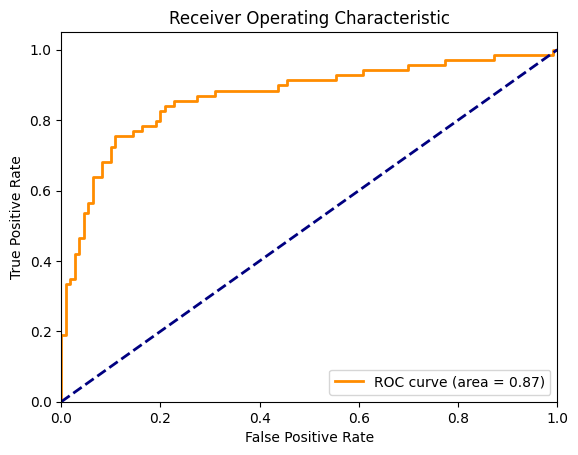

Best Threshold: 0.5117122107129374


In [48]:
# Get predicted probabilities
probs = pipeline.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Find the best threshold
optimal_idx = np.argmax(tpr - fpr)
best_threshold = thresholds[optimal_idx]
print(f'Best Threshold: {best_threshold}')

In [49]:
# Make predictions using the best threshold
predictions = (y_pred_prob >= best_threshold).astype(int)

# Evaluate model performance
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       110
           1       0.81      0.75      0.78        69

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



### Prediction Pipeline

In [50]:
X_train, y_train = train_df.drop(TARGET_COL, axis=1), train_df[TARGET_COL]
X_test = test_df

In [51]:
pipeline.fit(X_train, y_train)
# y_pred = pipeline.predict(X_test)
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
y_pred = (y_pred_prob >= best_threshold).astype(int)
# print("Classification report:\n\n{}".format(classification_report(y_test, y_pred)))

In [52]:
save_ss(ss, y_pred, file_name="iteration4_logistic_thershould_submission.csv")

Save at : Dataset/Submissions/iteration4_logistic_thershould_submission.csv


In [53]:
print("F1 Score:\n\n{}".format(0.77751))

F1 Score:

0.77751


## Iteration : 5 - Prediction Pipeline